In [9]:
import json
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sbn

%matplotlib inline

In [6]:
with open('/Volumes/thesis-data/dtype_dict.json', 'r') as f:
    dtypes = json.load(f)

df = pd.read_csv('/Volumes/thesis-data/main.csv', dtype=dtypes,
                 parse_dates=['PERIOD', 'ADMDATE', 'DISCDATE'])

In [7]:
from img.diabetes.cost_variation.main import plot_cost_variation

In [10]:
sbn.set_palette('colorblind')

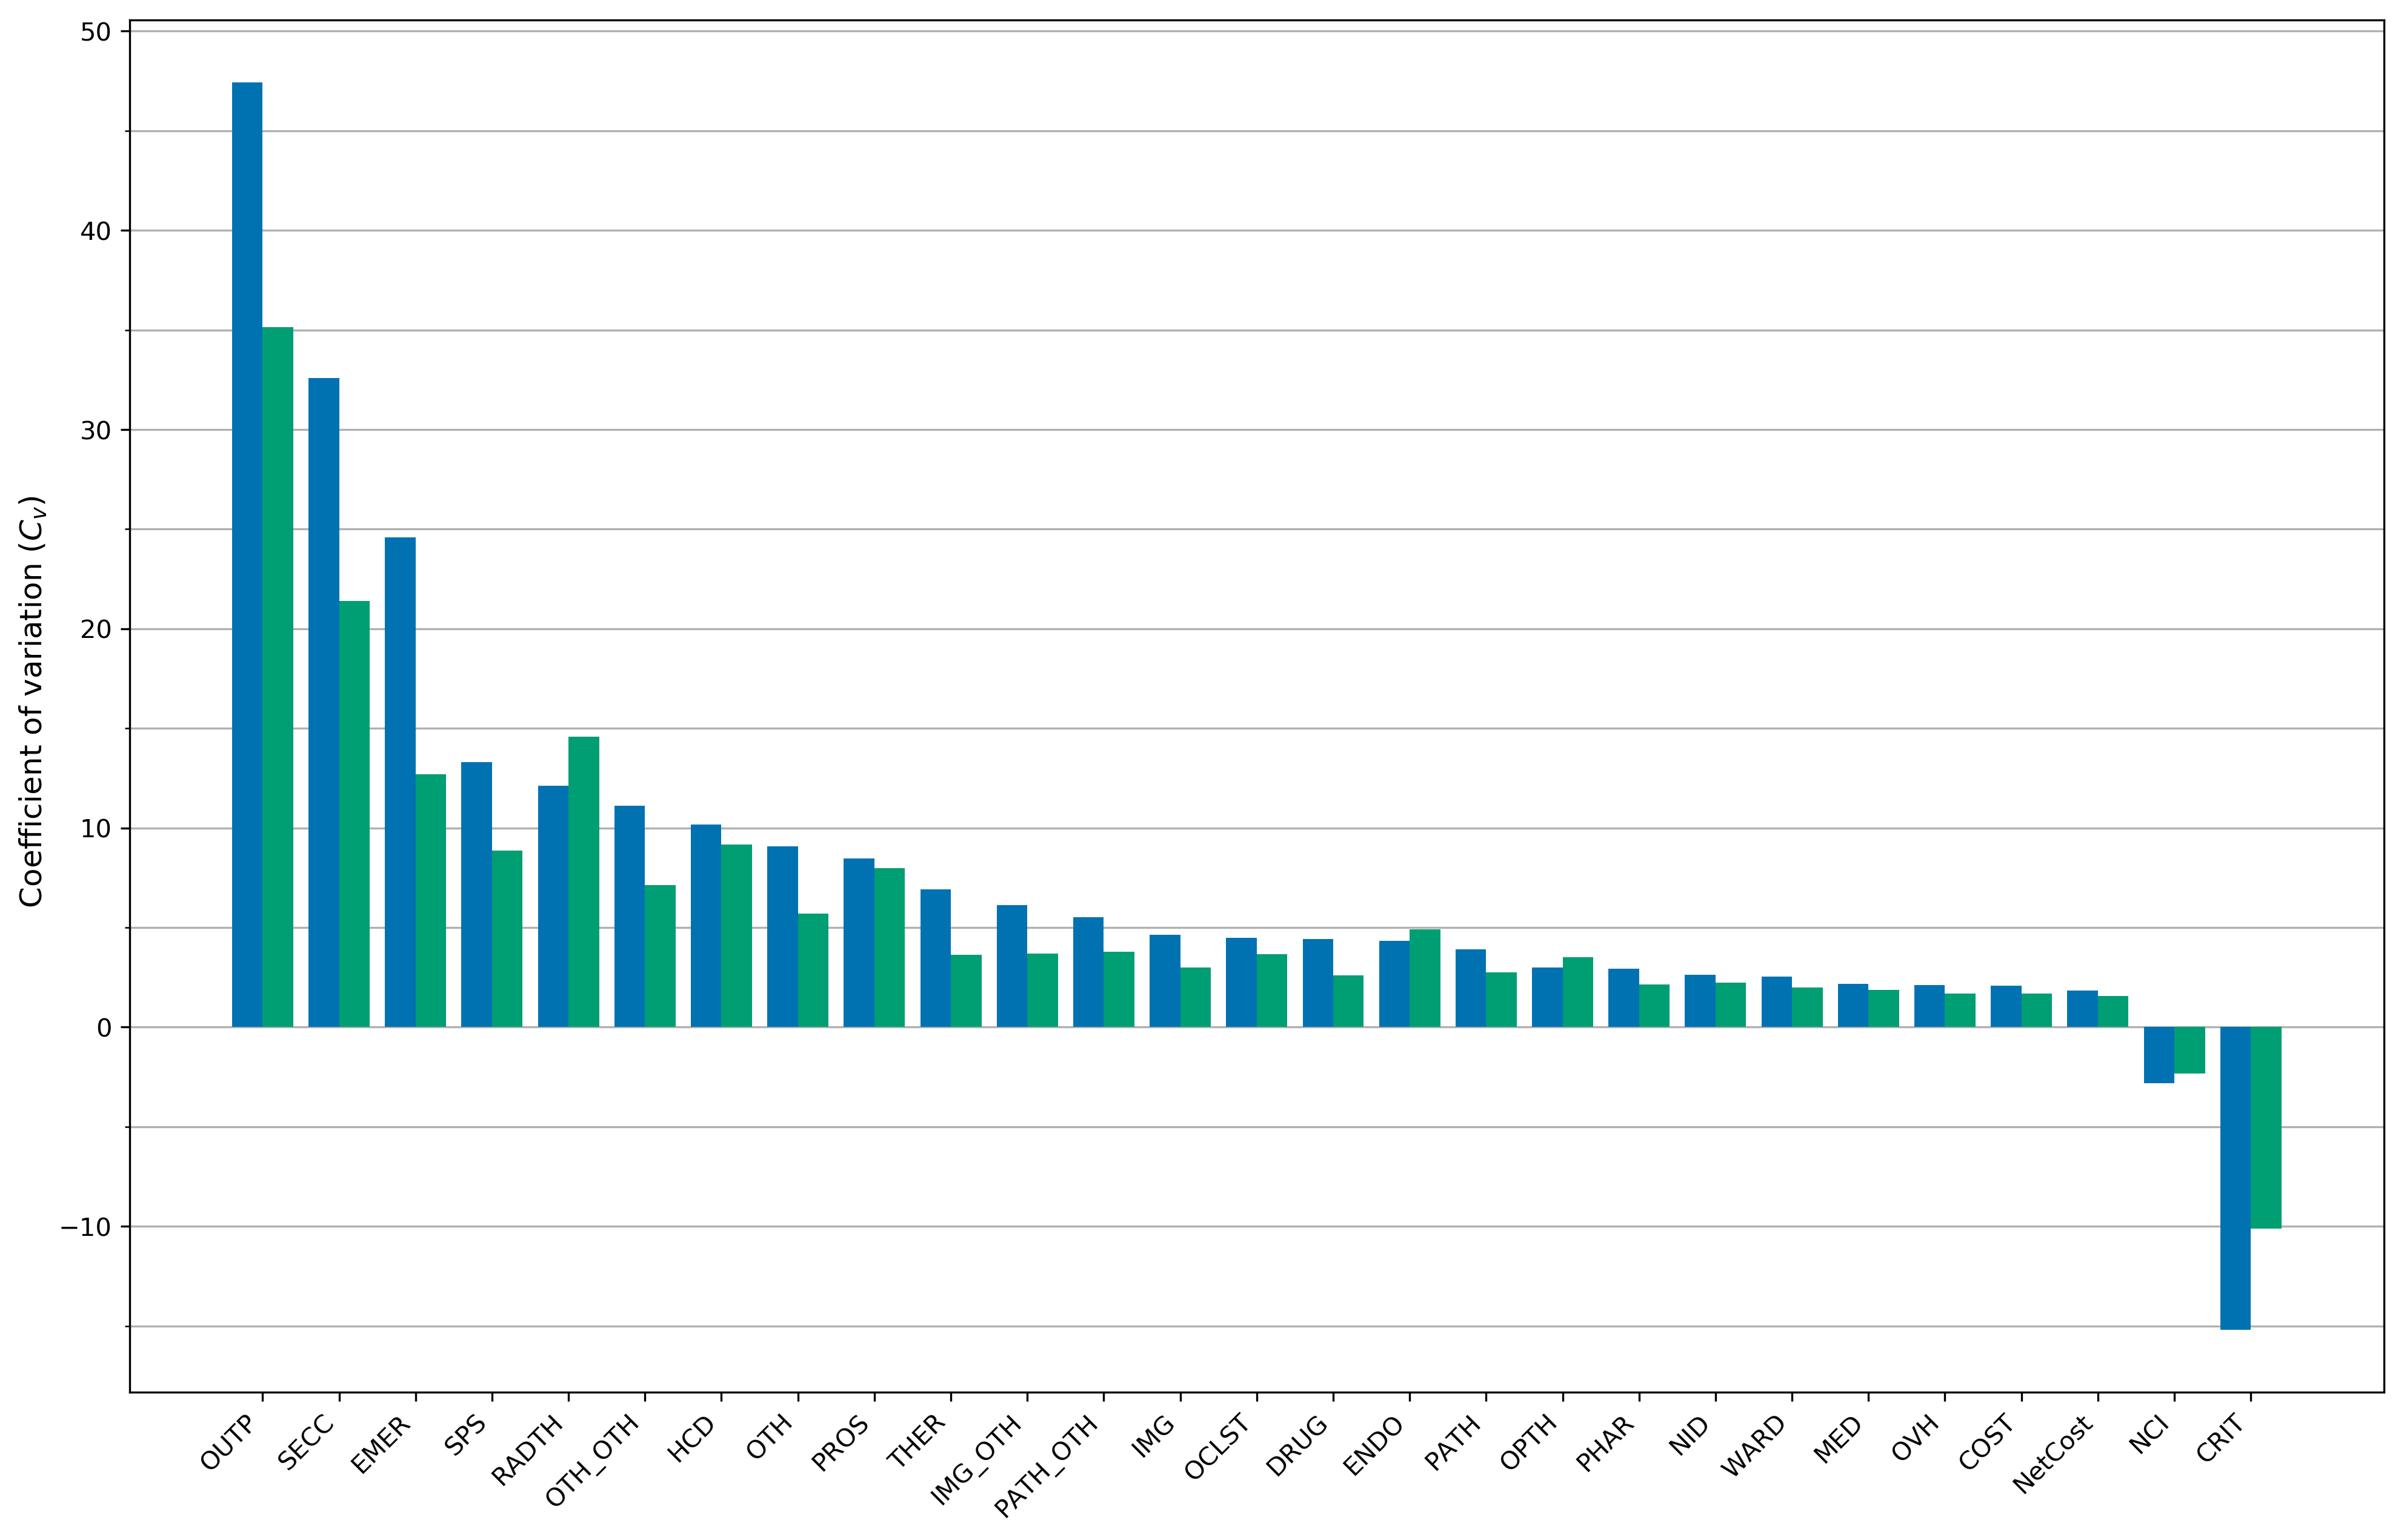

In [11]:
plot_cost_variation(df)

In [ ]:
costs = ['COST', 'NetCost', 'DRUG', 'ENDO', 'HCD', 'EMER', 'CRIT',
         'IMG', 'IMG_OTH', 'MED', 'NCI', 'NID', 'OCLST', 'OPTH',
         'OTH', 'OTH_OTH', 'OUTP', 'OVH', 'PATH', 'PATH_OTH',
         'PHAR', 'PROS', 'RADTH', 'SECC', 'SPS', 'THER', 'WARD']

In [ ]:
summed_costs = df.groupby('SPELL_ID')[costs].sum()
lengths_of_stay = df.groupby('SPELL_ID')['TRUE_LOS'].mean()
max_diag_nums = df.groupby('SPELL_ID')['DIAG_NO'].max()
summed_proc_nums = df.groupby('SPELL_ID')['PROC_NO'].sum()

In [ ]:
summative_stats = pd.concat([summed_costs, lengths_of_stay, max_diag_nums, summed_proc_nums], axis=1) \
                    .describe().iloc[1:].round(2)

In [ ]:
cols = sorted([c for c in summative_stats.columns if c not in ['TRUE_LOS', 'PROC_NO', 'DIAG_NO']]) \
       + ['TRUE_LOS', 'DIAG_NO', 'PROC_NO']

grouped_cols = []
start = 0
shift = 9
for i in range(3):
    end = start + shift + 1
    set_of_cols = cols[start:end]
    start = end
    grouped_cols.append(set_of_cols)

for i, set_of_cols in enumerate(grouped_cols):
    summative_stats[set_of_cols].to_latex(f'/Users/henrywilde/thesis/tex/data-analysis/tex/summative_stats{i}.tex')

In [ ]:
netcost = summed_costs['NetCost']

In [ ]:
netcost_los = pd.concat([netcost, lengths_of_stay], axis=1)

In [ ]:
fig, ax = plt.subplots(1, figsize=(14, 10), dpi=300)

X, y = netcost_los['TRUE_LOS'].values.reshape(-1, 1), netcost_los['NetCost'].values.reshape(-1, 1)

lr = LinearRegression()
y_pred = lr.fit(X, y).predict(X)

ax.scatter(X, y, s=2)
ylim = ax.get_ylim()
ax.plot(X, y_pred, 'r', lw=2)

ax.set_ylim(ylim)
ax.set_xlabel('Length of stay (days)')
ax.set_ylabel('Net cost of spell (£)');

In [ ]:
fig, ax = plt.subplots(1, figsize=(14, 10), dpi=300)

X = netcost_los[netcost_los['TRUE_LOS'] < np.percentile(netcost_los['TRUE_LOS'], 99.999)]['TRUE_LOS'].values
y = netcost_los[netcost_los['NetCost'] < np.percentile(netcost_los['NetCost'], 99.999)]['NetCost'].values
xs = np.linspace(0, X.max(), 300)

ax.scatter(X, y, color='k', s=2, alpha=0.01)
ylim = ax.get_ylim()

for i in range(8):
    p = np.poly1d(np.polyfit(X, y, i))
    ax.plot(xs, p(xs), label=i)

ax.set_ylim(ylim)
ax.set_xlabel('Length of stay (days)')
ax.set_ylabel('Net cost of spell (£)')
ax.legend(title='Degree');